In [1]:
import pandas as pd
import matplotlib.pyplot as plt


# Load the TSV file
file_path = '../2024-06-09_10-16-44_driver_stats.tsv'
data = pd.read_csv(file_path, sep='\t')

# Display the first few rows of the dataset to understand its structure
data.head()



,model,temperature,top_p,num_return_sequences,template,coherence,semantic_count,distinct_1,distinct_2,distinct_3,...,plain_subtrees_5,plain_subtrees_6,stripped_subtrees_3,stripped_subtrees_4,stripped_subtrees_5,stripped_subtrees_6,obfuscated_subtrees_3,obfuscated_subtrees_4,obfuscated_subtrees_5,obfuscated_subtrees_6
0,meta-llama-Meta-Llama-3-70B-Instruct,0.50,1.0,30,open_ended_default,0.466667,10.095238,0.059493,0.147869,0.206801,...,0.494845,0.574704,0.149987,0.315866,0.414219,0.501914,0.399434,0.520454,0.562720,0.611479
1,meta-llama-Meta-Llama-3-70B,0.50,1.0,30,open_ended_default,0.028571,1.761905,0.152093,0.259944,0.392433,...,0.445701,0.547884,0.399017,0.417513,0.445701,0.547884,0.565398,0.522487,0.526389,0.576455
2,meta-llama-Meta-Llama-3-70B-Instruct,0.75,1.0,30,open_ended_default,0.447619,12.238095,0.061388,0.162975,0.233613,...,0.590271,0.675690,0.161078,0.330283,0.476697,0.578864,0.456226,0.598822,0.651365,0.728707
3,meta-llama-Meta-Llama-3-70B,0.75,1.0,30,open_ended_default,0.052381,2.142857,0.155432,0.275701,0.387893,...,0.569276,0.579726,0.426674,0.519850,0.524110,0.542749,0.561428,0.603287,0.596657,0.635462
4,meta-llama-Meta-Llama-3-70B-Instruct,1.00,1.0,30,open_ended_default,0.484127,13.190476,0.059845,0.164608,0.238614,...,0.649650,0.722171,0.169330,0.341227,0.496621,0.605697,0.483669,0.620960,0.697267,0.773166


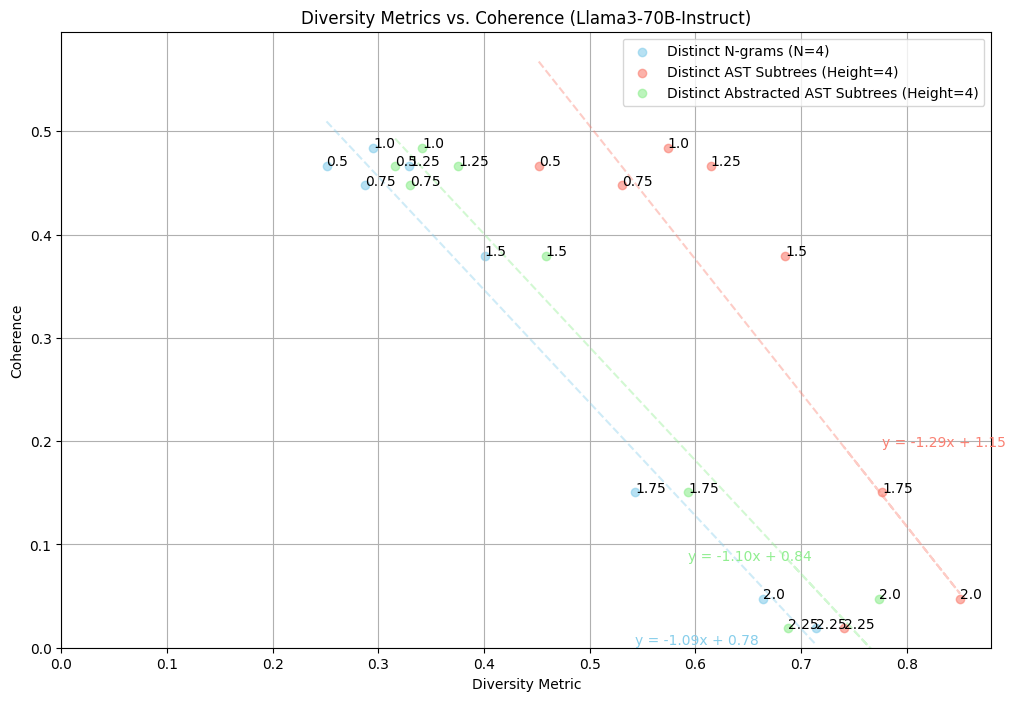

In [31]:
from scipy.stats import linregress

# Calculate the normalized semantic count
data = data[data["model"] == "meta-llama-Meta-Llama-3-70B-Instruct"]
data['semantic_count_norm'] = data['semantic_count'] / 30

# Prepare the scatter plot
plt.figure(figsize=(12, 8))

# Plot each diversity metric
# plt.scatter(data['coherence'], data['semantic_count_norm'], label='Semantic Count / 30', alpha=0.6)
# plt.scatter(data['coherence'], data['distinct_4'], label='Distinct 4', alpha=0.6)
# plt.scatter(data['coherence'], data['plain_subtrees_4'], label='Plain Subtrees 4', alpha=0.6)
# plt.scatter(data['coherence'], data['stripped_subtrees_4'], label='Stripped Subtrees 4', alpha=0.6)

# plt.scatter(data["semantic_count_norm"], data['coherence'], label='Semantic Count', alpha=0.6)

# ngram_color = 'blue'
# ast_color = 'red'
# # abstracted_ast_color = 'green'

# more pleasant colors
ngram_color = 'skyblue'
ast_color = 'salmon'
abstracted_ast_color = 'lightgreen'

# # Linear regression
#     slope, intercept, r_value, p_value, std_err = linregress(filtered_data[metric], filtered_data['coherence'])
ngram_slope, ngram_intercept, ngram_r_value, ngram_p_value, ngram_std_err = linregress(data['distinct_4'], data['coherence'])
ast_slope, ast_intercept, ast_r_value, ast_p_value, ast_std_err = linregress(data['plain_subtrees_4'], data['coherence'])
abstracted_ast_slope, abstracted_ast_intercept, abstracted_ast_r_value, abstracted_ast_p_value, abstracted_ast_std_err = linregress(data['stripped_subtrees_4'], data['coherence'])

plt.scatter(data['distinct_4'], data['coherence'], label='Distinct N-grams (N=4)', alpha=0.6, color=ngram_color)
plt.scatter(data['plain_subtrees_4'], data['coherence'], label='Distinct AST Subtrees (Height=4)', alpha=0.6, color=ast_color)
plt.scatter(data['stripped_subtrees_4'], data['coherence'], label='Distinct Abstracted AST Subtrees (Height=4)', alpha=0.6, color=abstracted_ast_color)

# Plot the linear regression lines
plt.plot(data['distinct_4'], ngram_slope * data['distinct_4'] + ngram_intercept, color=ngram_color, linestyle='dashed', alpha=0.4)
plt.plot(data['plain_subtrees_4'], ast_slope * data['plain_subtrees_4'] + ast_intercept, color=ast_color, linestyle='dashed', alpha=0.4)
plt.plot(data['stripped_subtrees_4'], abstracted_ast_slope * data['stripped_subtrees_4'] + abstracted_ast_intercept, color=abstracted_ast_color, linestyle='dashed', alpha=0.4)

# add a txt label to each linear regression line

plt.text(data['distinct_4'].iloc[-3], ngram_slope * data['distinct_4'].iloc[-1] + ngram_intercept, f"y = {ngram_slope:.2f}x + {ngram_intercept:.2f}", color=ngram_color, fontsize=10)
plt.text(data['plain_subtrees_4'].iloc[-3], ast_slope * data['plain_subtrees_4'].iloc[-1] + ast_intercept, f"y = {ast_slope:.2f}x + {ast_intercept:.2f}", color=ast_color, fontsize=10)
plt.text(data['stripped_subtrees_4'].iloc[-3], abstracted_ast_slope * data['stripped_subtrees_4'].iloc[-1] + abstracted_ast_intercept, f"y = {abstracted_ast_slope:.2f}x + {abstracted_ast_intercept:.2f}", color=abstracted_ast_color, fontsize=10)




# Label points with temperature
# for i, txt in enumerate(data['temperature']):
#     plt.annotate(f"{txt}", (data['coherence'].iat[i], data['semantic_count_norm'].iat[i]))

for i, txt in enumerate(data['temperature']):
    # plt.annotate(f"{txt}", (data['semantic_count_norm'].iat[i], data['coherence'].iat[i]))
    plt.annotate(f"{txt}", (data['distinct_4'].iat[i], data['coherence'].iat[i]))
    plt.annotate(f"{txt}", (data['plain_subtrees_4'].iat[i], data['coherence'].iat[i]))
    plt.annotate(f"{txt}", (data['stripped_subtrees_4'].iat[i], data['coherence'].iat[i]))
    
    


# set lower-bound to 0
plt.xlim(left=0)
plt.ylim(bottom=0)

cached_x = plt.xlim()
cached_y = plt.ylim()

# Add titles and labels
plt.title('Diversity Metrics vs. Coherence (Llama3-70B-Instruct)')
# plt.xlabel('Coherence')
# plt.ylabel('Metric Value')
plt.xlabel('Diversity Metric')
plt.ylabel('Coherence')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

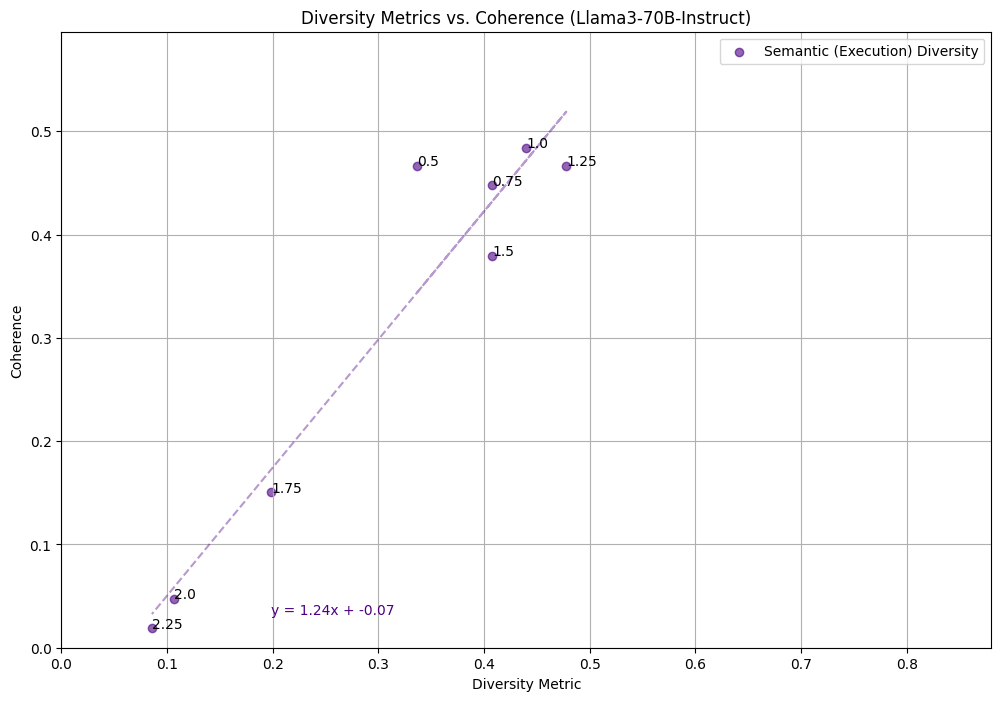

In [32]:
from scipy.stats import linregress

# Calculate the normalized semantic count
data = data[data["model"] == "meta-llama-Meta-Llama-3-70B-Instruct"]
data['semantic_count_norm'] = data['semantic_count'] / 30

# Prepare the scatter plot
plt.figure(figsize=(12, 8))


# more pleasant colors
semantic_count_color = 'indigo'

# # Linear regression
#     slope, intercept, r_value, p_value, std_err = linregress(filtered_data[metric], filtered_data['coherence'])
slope, intercept, r_value, p_value, std_err = linregress(data['semantic_count_norm'], data['coherence'])


plt.scatter(data["semantic_count_norm"], data['coherence'], label='Semantic (Execution) Diversity', alpha=0.6, color=semantic_count_color)

# Plot the linear regression lines
plt.plot(data['semantic_count_norm'], slope * data['semantic_count_norm'] + intercept, color=semantic_count_color, linestyle='dashed', alpha=0.4)

# add a txt label to each linear regression line
plt.text(data['semantic_count_norm'].iloc[-3], slope * data['semantic_count_norm'].iloc[-1] + intercept, f"y = {slope:.2f}x + {intercept:.2f}", color=semantic_count_color, fontsize=10)




# Label points with temperature
# for i, txt in enumerate(data['temperature']):
#     plt.annotate(f"{txt}", (data['coherence'].iat[i], data['semantic_count_norm'].iat[i]))

for i, txt in enumerate(data['temperature']):
    plt.annotate(f"{txt}", (data['semantic_count_norm'].iat[i], data['coherence'].iat[i]))

# Add titles and labels
plt.title('Diversity Metrics vs. Coherence (Llama3-70B-Instruct)')
# plt.xlabel('Coherence')
# plt.ylabel('Metric Value')
plt.xlabel('Diversity Metric')
plt.ylabel('Coherence')
# use cached 
plt.xlim(cached_x)
plt.ylim(cached_y)
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

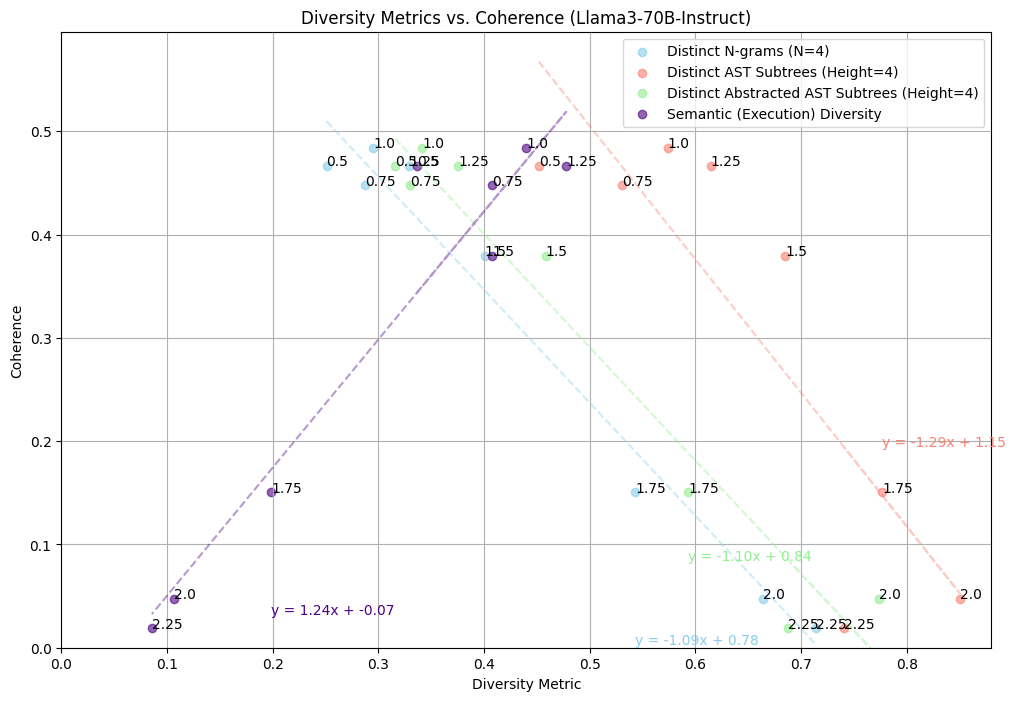

In [33]:
## all in one plot

# Calculate the normalized semantic count

data = data[data["model"] == "meta-llama-Meta-Llama-3-70B-Instruct"]
data['semantic_count_norm'] = data['semantic_count'] / 30

# Prepare the scatter plot
plt.figure(figsize=(12, 8))

# more pleasant colors
ngram_color = 'skyblue'
ast_color = 'salmon'
abstracted_ast_color = 'lightgreen'
semantic_count_color = 'indigo'

# # Linear regression
#     slope, intercept, r_value, p_value, std_err = linregress(filtered_data[metric], filtered_data['coherence'])
ngram_slope, ngram_intercept, ngram_r_value, ngram_p_value, ngram_std_err = linregress(data['distinct_4'], data['coherence'])
ast_slope, ast_intercept, ast_r_value, ast_p_value, ast_std_err = linregress(data['plain_subtrees_4'], data['coherence'])
abstracted_ast_slope, abstracted_ast_intercept, abstracted_ast_r_value, abstracted_ast_p_value, abstracted_ast_std_err = linregress(data['stripped_subtrees_4'], data['coherence'])
semantic_count_slope, semantic_count_intercept, semantic_count_r_value, semantic_count_p_value, semantic_count_std_err = linregress(data['semantic_count_norm'], data['coherence'])

plt.scatter(data['distinct_4'], data['coherence'], label='Distinct N-grams (N=4)', alpha=0.6, color=ngram_color)
plt.scatter(data['plain_subtrees_4'], data['coherence'], label='Distinct AST Subtrees (Height=4)', alpha=0.6, color=ast_color)
plt.scatter(data['stripped_subtrees_4'], data['coherence'], label='Distinct Abstracted AST Subtrees (Height=4)', alpha=0.6, color=abstracted_ast_color)
plt.scatter(data["semantic_count_norm"], data['coherence'], label='Semantic (Execution) Diversity', alpha=0.6, color=semantic_count_color)

# Plot the linear regression lines
plt.plot(data['distinct_4'], ngram_slope * data['distinct_4'] + ngram_intercept, color=ngram_color, linestyle='dashed', alpha=0.4)
plt.plot(data['plain_subtrees_4'], ast_slope * data['plain_subtrees_4'] + ast_intercept, color=ast_color, linestyle='dashed', alpha=0.4)
plt.plot(data['stripped_subtrees_4'], abstracted_ast_slope * data['stripped_subtrees_4'] + abstracted_ast_intercept, color=abstracted_ast_color, linestyle='dashed', alpha=0.4)
plt.plot(data['semantic_count_norm'], semantic_count_slope * data['semantic_count_norm'] + semantic_count_intercept, color=semantic_count_color, linestyle='dashed', alpha=0.4)

# add a txt label to each linear regression line

plt.text(data['distinct_4'].iloc[-3], ngram_slope * data['distinct_4'].iloc[-1] + ngram_intercept, f"y = {ngram_slope:.2f}x + {ngram_intercept:.2f}", color=ngram_color, fontsize=10)
plt.text(data['plain_subtrees_4'].iloc[-3], ast_slope * data['plain_subtrees_4'].iloc[-1] + ast_intercept, f"y = {ast_slope:.2f}x + {ast_intercept:.2f}", color=ast_color, fontsize=10)
plt.text(data['stripped_subtrees_4'].iloc[-3], abstracted_ast_slope * data['stripped_subtrees_4'].iloc[-1] + abstracted_ast_intercept, f"y = {abstracted_ast_slope:.2f}x + {abstracted_ast_intercept:.2f}", color=abstracted_ast_color, fontsize=10)
plt.text(data['semantic_count_norm'].iloc[-3], semantic_count_slope * data['semantic_count_norm'].iloc[-1] + semantic_count_intercept, f"y = {semantic_count_slope:.2f}x + {semantic_count_intercept:.2f}", color=semantic_count_color, fontsize=10)


# Label points with temperature
# for i, txt in enumerate(data['temperature']):
#     plt.annotate(f"{txt}", (data['coherence'].iat[i], data['semantic_count_norm'].iat[i]))

for i, txt in enumerate(data['temperature']):
    plt.annotate(f"{txt}", (data['distinct_4'].iat[i], data['coherence'].iat[i]))
    plt.annotate(f"{txt}", (data['plain_subtrees_4'].iat[i], data['coherence'].iat[i]))
    plt.annotate(f"{txt}", (data['stripped_subtrees_4'].iat[i], data['coherence'].iat[i]))
    plt.annotate(f"{txt}", (data['semantic_count_norm'].iat[i], data['coherence'].iat[i]))
    
    
# Add titles and labels
plt.title('Diversity Metrics vs. Coherence (Llama3-70B-Instruct)')
# plt.xlabel('Coherence')
# plt.ylabel('Metric Value')
plt.xlabel('Diversity Metric')
plt.ylabel('Coherence')
plt.legend()

plt.xlim(cached_x)
plt.ylim(cached_y)

# Show the plot
plt.grid(True)
plt.show()


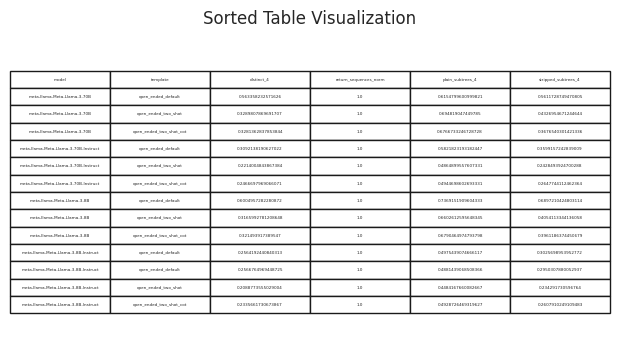

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Path to the TSV file
file_path = '/data1/shypula/prog_diversity/open_ended/2024-06-10_23-49-06_driver_stats.tsv'

# Load the TSV file
data = pd.read_csv(file_path, sep='\t')
data = data[data["temperature"] == 1.0]
data = data[data["top_p"] == 1.0]

# Select and calculate necessary columns
data['return_sequences_norm'] = data['num_return_sequences'] / 30
selected_columns = ['model', 'template', 'distinct_4', 'return_sequences_norm', 'plain_subtrees_4', 'stripped_subtrees_4']

# Filter data to include only the necessary columns
filtered_data = data[selected_columns]

# Sort the data by 'model' and then 'template'
sorted_data = filtered_data.sort_values(by=['model', 'template'])

# Create a figure and an axis to host the table
fig, ax = plt.subplots(figsize=(10, 4))  # You may need to adjust the size
ax.set_title('Sorted Table Visualization')  # Optional: set a title for the table

# Use seaborn's color palette for aesthetics
sns.set_theme(style="whitegrid")

# Create the table inside the plot
the_table = plt.table(cellText=sorted_data.values, colLabels=sorted_data.columns, loc='center', cellLoc='center')

# Hide axes
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.set_frame_on(False)

# Adjust layout to fit the table
plt.subplots_adjust(left=0.2, right=0.8, top=0.9, bottom=0.1)
# increase dpi 
plt.savefig('/home/shypula/program_cal_diverse/plots/formatted_table.png', dpi=300)

# # Save the figure
# plt.savefig('/mnt/data/formatted_table.png')

# Optionally display the figure if running interactively
plt.show()


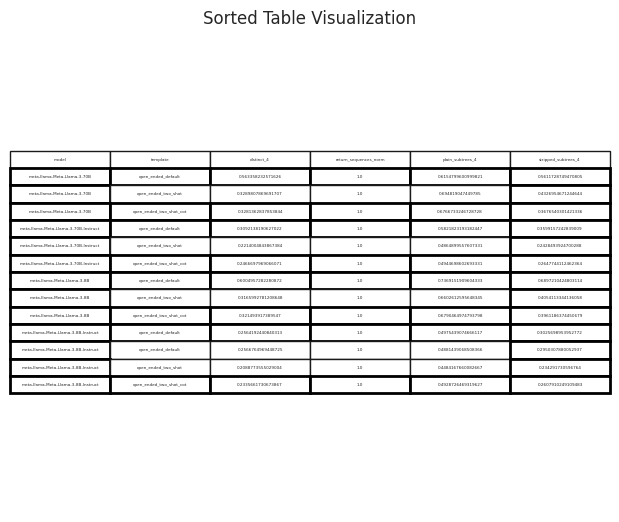

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Path to the TSV file
file_path = '/data1/shypula/prog_diversity/open_ended/2024-06-10_23-49-06_driver_stats.tsv'

# Load the TSV file
data = pd.read_csv(file_path, sep='\t')
data = data[data["temperature"] == 1.0]
data = data[data["top_p"] == 1.0]

# Select and calculate necessary columns
data['semantic_count_norm'] = data['semantic_count'] / 30
selected_columns = ['model', 'template', 'distinct_4', 'return_sequences_norm', 'plain_subtrees_4', 'stripped_subtrees_4']

# Filter data to include only the necessary columns
filtered_data = data[selected_columns]

# Sort the data by 'model' and then 'template'
sorted_data = filtered_data.sort_values(by=['model', 'template'])

# Create a figure and an axis to host the table
fig, ax = plt.subplots(figsize=(10, 6))  # Adjust the size as needed
ax.set_title('Sorted Table Visualization')  # Optional: set a title for the table

# Use seaborn's color palette for aesthetics
sns.set_theme(style="whitegrid")

# Create the table and save the object for further manipulation
the_table = plt.table(cellText=sorted_data.values, colLabels=sorted_data.columns, loc='center', cellLoc='center')

# Track start and end of each group
last_model = None
group_start = 1
for row in range(1, len(sorted_data) + 2):  # +2 to handle the last group
    if row <= len(sorted_data):
        model = sorted_data.iloc[row-1, 0]
    if row == len(sorted_data) + 1 or model != last_model:
        if last_model is not None:
            # Apply bounding box to the previous group
            for r in range(group_start, row):
                for c in range(len(sorted_data.columns)):
                    cell = the_table.get_celld()[(r, c)]
                    # Apply only to the outer borders of the group
                    if r == group_start:  # Top border
                        cell.set_edgecolor('black')
                        cell.set_linewidth(2)
                    if r == row - 1:  # Bottom border
                        cell.set_edgecolor('black')
                        cell.set_linewidth(2)
                    if c == 0:  # Left border
                        cell.set_edgecolor('black')
                        cell.set_linewidth(2)
                    if c == len(sorted_data.columns) - 1:  # Right border
                        cell.set_edgecolor('black')
                        cell.set_linewidth(2)
        group_start = row
        last_model = model

# Hide axes
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.set_frame_on(False)

# Adjust layout to fit the table
plt.subplots_adjust(left=0.2, right=0.8, top=0.9, bottom=0.1)

# Save the figure
plt.savefig('/home/shypula/program_cal_diverse/plots/formatted_table.png', dpi=300)

# Optionally display the figure if running interactively
plt.show()


In [48]:
file_path = '/data1/shypula/prog_diversity/open_ended/2024-06-10_23-49-06_driver_stats.tsv'

# Load the TSV file
data = pd.read_csv(file_path, sep='\t')
data = data[data["temperature"] == 1.0]
data = data[data["top_p"] == 1.0]

# Select and calculate necessary columns
data['semantic_count_norm'] = data['semantic_count'] / 30
selected_columns = ['model', 'template', 'coherence', 'semantic_count_norm','distinct_4',  'plain_subtrees_4', 'stripped_subtrees_4']
# truncate precision to .2f
sorted_data = data[selected_columns].sort_values(by=['model', 'template']).round(4)
# multiple by 100 to get percentage
sorted_data['coherence'] = sorted_data['coherence'] * 100
sorted_data['semantic_count_norm'] = sorted_data['semantic_count_norm'] * 100
sorted_data['distinct_4'] = sorted_data['distinct_4'] * 100
sorted_data['plain_subtrees_4'] = sorted_data['plain_subtrees_4'] * 100
sorted_data['stripped_subtrees_4'] = sorted_data['stripped_subtrees_4'] * 100

sorted_data

,model,template,coherence,semantic_count_norm,distinct_4,plain_subtrees_4,stripped_subtrees_4
6,meta-llama-Meta-Llama-3-70B,open_ended_default,5.24,8.41,56.34,61.55,56.12
7,meta-llama-Meta-Llama-3-70B,open_ended_two_shot,18.10,23.02,32.90,69.48,43.27
8,meta-llama-Meta-Llama-3-70B,open_ended_two_shot_cot,24.60,26.51,32.81,67.67,36.77
9,meta-llama-Meta-Llama-3-70B-Instruct,open_ended_default,46.19,44.60,30.92,58.22,35.99
10,meta-llama-Meta-Llama-3-70B-Instruct,open_ended_two_shot,30.63,33.97,22.14,48.65,24.28
11,meta-llama-Meta-Llama-3-70B-Instruct,open_ended_two_shot_cot,43.02,41.27,24.67,49.45,26.48
0,meta-llama-Meta-Llama-3-8B,open_ended_default,4.60,7.30,60.05,73.69,68.97
1,meta-llama-Meta-Llama-3-8B,open_ended_two_shot,20.79,22.06,31.66,66.03,40.54
2,meta-llama-Meta-Llama-3-8B,open_ended_two_shot_cot,19.52,24.13,32.15,67.90,39.61
3,meta-llama-Meta-Llama-3-8B-Instruct,open_ended_default,59.37,60.63,25.64,49.75,30.26
